In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib as mpl


**importing the csv files

In [ ]:
data_accepted = pd.read_csv("accepted_2007_to_2018q4.csv", low_memory=False)


In [ ]:
# To display the entire rows without truncation
pd.set_option('display.max_rows', 100)

# Data analysis

In [ ]:
df_accepted = data_accepted

In [ ]:
df_rejected = data_rejected

NameError: name 'data_rejected' is not defined

**More Preprocessing

In [ ]:
df=data_accepted.copy()

In [ ]:
df.shape

(8406, 151)

In [ ]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [ ]:
df['annual_inc_log'] = df['annual_inc'].apply(np.log)

## Model Building

In [ ]:
#Reduce the dataset to the following columns that will be used for the prediction.

columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc_log','loan_status_bin','dti',
       'fico_range_low', 'inq_last_6mths']
df = df[columns]

In [ ]:
#Drop all rows with null values as we have sufficient amount of data
df.dropna(inplace=True)

In [ ]:
df.shape

(7072, 11)

In [ ]:
#converting grade from string to numeric
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [ ]:
# Remove string characters in 'term' column
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip('months'))

In [ ]:
# Remove string characters in 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [ ]:
# Change datatypes to INTs in the following columns
df.term = df.term.astype("int64") 
df.emp_length = df.emp_length.astype("int64")

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc_log,loan_status_bin,dti,fico_range_low,inq_last_6mths
0,3600.0,36,13.99,123.03,3,10,10.915088,0.0,5.91,675.0,1.0
1,24700.0,36,11.99,820.28,3,10,11.082143,0.0,16.06,715.0,4.0
2,20000.0,60,10.78,432.66,2,10,11.050890,0.0,10.78,695.0,0.0
4,10400.0,60,22.45,289.91,6,3,11.556301,0.0,25.37,695.0,3.0
5,11950.0,36,13.44,405.18,3,4,10.434116,0.0,10.20,690.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8398,10000.0,36,9.17,318.79,2,10,11.002100,0.0,8.00,660.0,0.0
8399,13525.0,60,12.59,304.91,3,4,10.839581,0.0,33.86,710.0,2.0
8400,13000.0,36,6.24,396.91,1,1,10.933107,0.0,16.91,680.0,0.0
8404,21600.0,60,13.67,498.91,3,5,11.002100,1.0,22.68,700.0,0.0


In [ ]:
df_dummies = pd.get_dummies(df) #get dummy for categorical features

In [ ]:
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)] #drop all dummy-variables which contain not at least 1% ones
df_dummies.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df_dummies.head()

,loan_amnt,int_rate,installment,grade,annual_inc_log,loan_status_bin,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,addr_state_NY,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI
0,3600.0,13.99,123.03,3,10.915088,0.0,5.91,0.0,675.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,24700.0,11.99,820.28,3,11.082143,0.0,16.06,1.0,715.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,10.78,432.66,2,11.050890,0.0,10.78,0.0,695.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,22.45,289.91,6,11.556301,0.0,25.37,1.0,695.0,3.0,...,0,0,0,1,0,0,0,0,0,0
5,11950.0,13.44,405.18,3,10.434116,0.0,10.20,0.0,690.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('loan_status_bin', axis=1)
y = df['loan_status_bin']

**Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
sc.clip= False
clf = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [ ]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipe_lr.score(X_train, y_train) #accuracy rate

0.8069648223439986

ROC-AUC-score:  0.6082944355730255


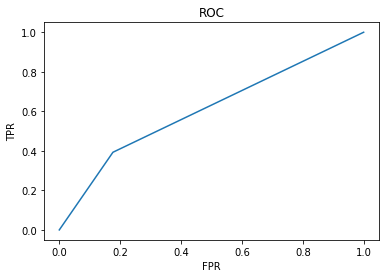

In [ ]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [ ]:
#Testing with LR.score:

accuracy_score(y_test, pipe_lr.predict(X_test))

0.8059558838049724

In [ ]:
import pickle
pickle_out= open("pick.pkl",mode="wb")
pickle.dump(pipe_lr,pickle_out)
pickle_out.close()

In [ ]:
X_train.shape

(5657, 10)